In [1]:
# Import dependencies
import pandas as pd
import numpy as np

## **Loading in CSV**

In [2]:
# Read in raw data of test_df from github
url = 'https://raw.githubusercontent.com/eenabow/oscar_nominations/main/data/oscars2_df.csv'
test_df = pd.read_csv(url, index_col=None)

In [3]:
test_df.head()

,movie,duration,metascore,gross,critic_reviews,awards_wins,popularity,awards_nominations,golden_globes_nominated,oscar_nominated
0,Kate & Leopold,118,44.0,47100000.0,125.0,1,2363.0,4,2,1
1,Chicken Run,84,88.0,106790000.0,186.0,5,2859.0,11,1,0
2,Fantastic Four,106,40.0,154700000.0,278.0,0,1876.0,0,0,0
3,Frida,123,61.0,25780000.0,126.0,2,2508.0,12,2,1
4,The Lord of the Rings: The Fellowship of the Ring,178,92.0,313840000.0,296.0,26,204.0,67,4,1


In [4]:
# Will need to remove movie from test_df for actual model 
test_df = test_df[["duration", "metascore", "gross", "critic_reviews", "awards_wins", "popularity", "awards_nominations", "golden_globes_nominated", "oscar_nominated"]]

**XGBoost Machine Learning using GridSearch** 

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [6]:
# Remove the labels from the features
X_data = test_df.drop('oscar_nominated', axis = 1)

# Labels are the values we want to predict
y = test_df.oscar_nominated

In [7]:
X_data

,duration,metascore,gross,critic_reviews,awards_wins,popularity,awards_nominations,golden_globes_nominated
0,118,44.0,47100000.0,125.0,1,2363.0,4,2
1,84,88.0,106790000.0,186.0,5,2859.0,11,1
2,106,40.0,154700000.0,278.0,0,1876.0,0,0
3,123,61.0,25780000.0,126.0,2,2508.0,12,2
4,178,92.0,313840000.0,296.0,26,204.0,67,4
...,...,...,...,...,...,...,...,...
1039,132,93.0,11300000.0,300.0,15,7.0,55,3
1040,130,90.0,10710000.0,180.0,9,11.0,30,2
1041,111,58.0,22250000.0,164.0,1,151.0,5,1
1042,122,58.0,11940000.0,86.0,0,115.0,2,1


In [8]:
#Split the dataset into train and Test
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=test_size, random_state=seed)


**MODELS 1 & 2**

In [9]:
#Train the XGboost Model for Classification
model1 = xgb.XGBClassifier(n_jobs= -1)
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)


/Users/lhabersham/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:36:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:36:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
#prediction and Classification Report
from sklearn.metrics import classification_report

pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)

print('Model 1 XGboost Report %r' % (classification_report(y_test, pred1)))
print('Model 2 XGboost Report %r' % (classification_report(y_test, pred2)))

Model 1 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87       158\n           1       0.87      0.87      0.87       156\n\n    accuracy                           0.87       314\n   macro avg       0.87      0.87      0.87       314\nweighted avg       0.87      0.87      0.87       314\n'
Model 2 XGboost Report '              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89       158\n           1       0.89      0.88      0.89       156\n\n    accuracy                           0.89       314\n   macro avg       0.89      0.89      0.89       314\nweighted avg       0.89      0.89      0.89       314\n'


/Users/lhabersham/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [11]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 1: %.2f" % (accuracy_score(y_test, pred1) * 100))
print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))

Accuracy for model 1: 86.94
Accuracy for model 2: 88.85


**Model 3**

In [12]:
#Let's do a little Gridsearch, Hyperparameter Tunning
model3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [13]:
train_model3 = model3.fit(X_train, y_train)
pred3 = train_model3.predict(X_test)
print("Accuracy for model 3: %.2f" % (accuracy_score(y_test, pred3) * 100))

[11:36:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for model 3: 85.67


 **Model 4**

In [14]:
from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':[2,10,25],
 'min_child_weight':[2,10,25]
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( ), 
 param_grid = param_test, scoring='accuracy',n_jobs=4,iid=False, cv=5, verbose =10)

train_model4 = gsearch.fit(X_train, y_train)
pred4 = train_model4.predict(X_test)
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4) * 100))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    4.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    8.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.5s
[Parallel(n_jobs=4)]: Done  43 out of  45 | elapsed:   11.5s remaining:    0.5s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   11.5s finished
/Users/lhabersham/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(
/Users/lhabersham/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encod

[11:36:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for model 4: 87.58


/Users/lhabersham/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


**Best accuracy was 88.85 from Model 2**

In [15]:
# Save best parameters as a variable from Model 2 
xgb_best= xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)

xgb_best.fit(X_data, y)

[11:36:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
# Export the SAV machine learning file 
import joblib

joblib.dump(xgb_best, "xgb_oscars.joblib")

['xgb_oscars.joblib']

**Visualize best parameters of the model and weights of features**


In [17]:
# Save features columns as a list 
columns_list = list(test_df.columns)[0:-1]
columns_list

['duration',
 'metascore',
 'gross',
 'critic_reviews',
 'awards_wins',
 'popularity',
 'awards_nominations',
 'golden_globes_nominated']

In [18]:
# Find the weights of each feature and how they impact the score
feature_imp = pd.Series(train_model2.feature_importances_,index=columns_list).sort_values(ascending=False)
feature_imp

awards_nominations         0.389193
golden_globes_nominated    0.146773
awards_wins                0.093654
popularity                 0.092385
gross                      0.072624
metascore                  0.072149
duration                   0.069429
critic_reviews             0.063794
dtype: float32

No handles with labels found to put in legend.


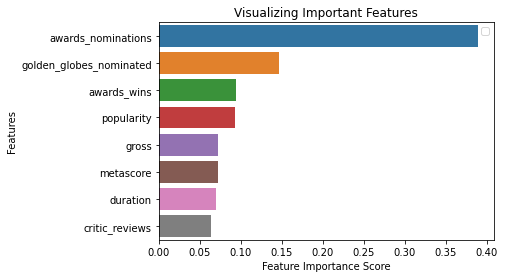

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
plt.savefig('xgbmodel2_importantfeatures.png')